In [1]:
%pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.12.0+cpu.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.0+cpu.html
     |████████████████████████████████| 286 kB 9.0 MB/s 
     |████████████████████████████████| 641 kB 42.5 MB/s 
     |████████████████████████████████| 311 kB 38.0 MB/s 
     |████████████████████████████████| 121 kB 10.7 MB/s 
     |████████████████████████████████| 467 kB 28.7 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=d65134340a8f33249c5163fb6bd745d06ef78bafcd71d15502f9ae7771741d63
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric


In [2]:
import torch
import torch_geometric as pygeom 

In [4]:
dataset = pygeom.datasets.TUDataset('./mutag', "MUTAG", cleaned=True)

Extracting mutag/MUTAG/MUTAG.zip
Processing...
Done!


In [5]:
len(dataset)  # set of graph: each graph = molecule

135

In [8]:
# PS: each dataset in pygeom is totally different, with diff obj (graph, graph of graph, time series etc) 
# each of this struct has different property

g = dataset[0] # primo graph
print(g)
# x = feature mapping 
# row = atoms
# colm = 
g.x.shape # [17, 7] ---> 17 molecole, 7 tipi di atomi (atomi in 1-hot)

Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])


torch.Size([17, 7])

<BarContainer object of 7 artists>

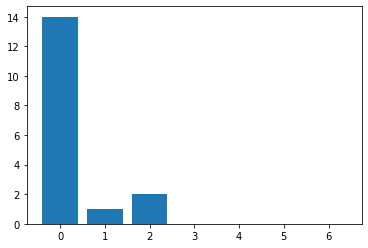

In [11]:
# extra on visualization
import matplotlib.pyplot as plt
plt.bar(range(7), g.x.sum(0)) # sum by rows = count tipe of atoms

In [16]:
# label : g.y ---> in this case=scalar
g.y
# connection  ~ adj matrix: better in terms of memory  
print(g.edge_index.shape) 
g.edge_index .T

# ogni indice del primo array è connesso al corrispettivo indice del secondo 

torch.Size([2, 38])


tensor([[ 0,  1],
        [ 0,  5],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 3,  2],
        [ 3,  4],
        [ 3,  9],
        [ 4,  3],
        [ 4,  5],
        [ 4,  6],
        [ 5,  0],
        [ 5,  4],
        [ 6,  4],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 8,  7],
        [ 8,  9],
        [ 8, 13],
        [ 9,  3],
        [ 9,  8],
        [ 9, 10],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [12, 11],
        [12, 13],
        [12, 14],
        [13,  8],
        [13, 12],
        [14, 12],
        [14, 15],
        [14, 16],
        [15, 14],
        [16, 14]])

In [18]:
# Network x ---> lib for generate random graph + graphical rappresentation 
# can be use in combination with torch_geometric.utils (convert etc)
pygeom.utils.is_undirected(g.edge_index)  # return TRUE
import networkx as nx

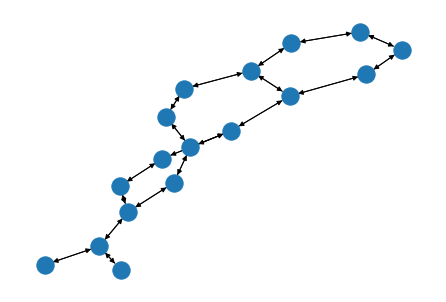

In [22]:
nx.draw(pygeom.utils.to_networkx(g))

In [27]:
# transform in graph ---> different by classic transform (we cannot modify the struct of the data)
# use pygoem (inside the datasets pckg)
trans = pygeom.transforms.Compose([
    # a kind of data augment --> add degree of the node as extra feat
    pygeom.transforms.OneHotDegree(10),
    # spare version of ADJ matrix
    pygeom.transforms.ToSparseTensor()
])

dataset = pygeom.datasets.TUDataset('./mutag', 'MUTAG', cleaned=True, transform=trans)

In [29]:
g = dataset[0]
print(g.x.shape)

# we have get also a new property: 
g.adj_t #adj matrix in scipy 

#density = number of non-zero link. big density = bad idea to use a sparse tensor

torch.Size([17, 18])


SparseTensor(row=tensor([ 0,  0,  1,  1,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  6,  6,  7,  7,
                            8,  8,  8,  9,  9,  9, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14,
                           15, 16]),
             col=tensor([ 1,  5,  0,  2,  1,  3,  2,  4,  9,  3,  5,  6,  0,  4,  4,  7,  6,  8,
                            7,  9, 13,  3,  8, 10,  9, 11, 10, 12, 11, 13, 14,  8, 12, 12, 15, 16,
                           14, 14]),
             size=(17, 17), nnz=38, density=13.15%)